In [23]:
#如果第二层多几个节点，会完全拟合数据吗？

import numpy as np
import matplotlib.pyplot as plt

In [2]:
sampleNo = 40;
mu = 0
sigma = 3
x = np.random.normal(mu, sigma, sampleNo)
mu = 0
sigma = 3
y = np.random.normal(mu, sigma, sampleNo)
# group
s = np.vstack((x,y)).T
if s.shape[1] == 2:
    s = np.insert(s, 2, values=0, axis=1) # 增加一列标记值
s0 = np.array([])
s1 = np.array([])
for i in range(sampleNo):
    if(abs(s[i,0])+abs(s[i,1])<=5):
        s0 = np.append(s0, np.array([s[i,0],s[i,1]]), axis = 0)
    else:
        s1 = np.append(s1, np.array([s[i,0],s[i,1]]), axis = 0)
        s[i,2] = 1
     
s0 = s0.reshape(int(s0.size/2), 2)
s1 = s1.reshape(int(s1.size/2), 2)

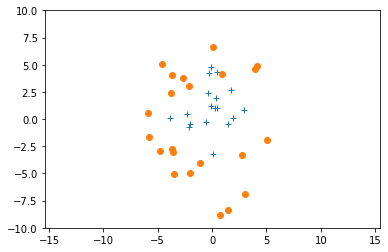

In [3]:
plt.plot(s0[:,0],s0[:,1],'+')
plt.plot(s1[:,0],s1[:,1],'o')
plt.axis("equal")
plt.axis([-10,10,-10,10])
plt.show()

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

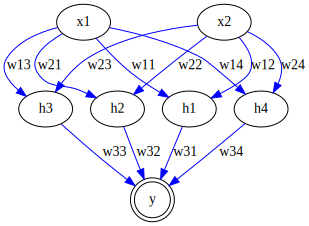

In [13]:
from graphviz import Digraph
u = Digraph()
u.edge("x1", "h1", label="w11", color="blue")
u.edge("x1", "h2", label="w21", color="blue")
u.edge("x1", "h3", label="w13", color="blue")
u.edge("x1", "h4", label="w14", color="blue")
u.edge("x2", "h1", label="w12", color="blue")
u.edge("x2", "h2", label="w22", color="blue")
u.edge("x2", "h3", label="w23", color="blue")
u.edge("x2", "h4", label="w24", color="blue")
u.edge("h1", "y", label="w31", color="blue")
u.edge("h2", "y", label="w32", color="blue")
u.edge("h3", "y", label="w33", color="blue")
u.edge("h4", "y", label="w34", color="blue")
u.node("y", shape="doublecircle")
u

In [20]:
def twolayerNN2(s, sampleNo):
    # 随机初始化各个参数
    w11 = np.random.rand()
    w12 = np.random.rand()
    w21 = np.random.rand()
    w22 = np.random.rand()
    w13 = np.random.rand()
    w14 = np.random.rand()
    w24 = np.random.rand()
    w23 = np.random.rand()
    w31 = np.random.rand()
    w32 = np.random.rand()
    w33 = np.random.rand()
    w34 = np.random.rand()
    b1 = np.random.rand()
    b2 = np.random.rand()
    b3 = np.random.rand()
    b4 = np.random.rand()
    b5 = np.random.rand()
    loss = 100000
    epoch = 0
    MaxEpoch = 1000
    lr = 0.1

    while True:
        if(epoch%20==0):
            print("epoch:", epoch)
            print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
            print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
            print("w13:%.2f, w23:%.2f, b3:%.2f"%(w13,w23,b3))
            print("w31:%.2f, w32:%.2f, w33:%.2f, b4:%.2f"%(w31,w32,w33,b4))
        lastloss = loss
        loss = 0
        partialw11 = 0
        partialw12 = 0
        partialb1 = 0
        partialw21 = 0
        partialw22 = 0
        partialb2 = 0
        partialw13 = 0
        partialw23 = 0
        partialb3 = 0
        partialw14 = 0
        partialw24 = 0
        partialb4 = 0
        partialw31 = 0
        partialw32 = 0
        partialw33 = 0
        partialw34 = 0
        partialb5 = 0
        for k in range(sampleNo):
            h1 = sigmoid(w11*s[k,0]+w12*s[k,1]+b1)
            h2 = sigmoid(w21*s[k,0]+w22*s[k,1]+b2)
            h3 = sigmoid(w13*s[k,0]+w23*s[k,1]+b3)
            h4 = sigmoid(w14*s[k,0]+w24*s[k,1]+b4)
            yhat = sigmoid(w31*h1+w32*h2+w33*h3+w34*h4+b5)
            #print("%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f"%(s[k,0], s[k,1], s[k,2], h1, h2, yhat))
            y = s[k,2]
            loss += (yhat-y)*(yhat-y)

            partialw31 += 2*(yhat-y)*yhat*(1-yhat)*h1
            partialw32 += 2*(yhat-y)*yhat*(1-yhat)*h2
            partialw33 += 2*(yhat-y)*yhat*(1-yhat)*h3
            partialw34 += 2*(yhat-y)*yhat*(1-yhat)*h4
            partialb5 += 2*(yhat-y)*yhat*(1-yhat)

            partialh1 = 2*(yhat-y)*yhat*(1-yhat)*w31
            partialh2 = 2*(yhat-y)*yhat*(1-yhat)*w32
            partialh3 = 2*(yhat-y)*yhat*(1-yhat)*w33
            partialh4 = 2*(yhat-y)*yhat*(1-yhat)*w34

            partialw11 += partialh1*h1*(1-h1)*s[k,0]
            partialw12 += partialh1*h1*(1-h1)*s[k,1]
            partialb1 += partialh1*h1*(1-h1)

            partialw21 += partialh2*h2*(1-h2)*s[k,0]
            partialw22 += partialh2*h2*(1-h2)*s[k,1]
            partialb2 += partialh2*h2*(1-h2)
            
            partialw13 += partialh3*h3*(1-h3)*s[k,0]
            partialw23 += partialh3*h3*(1-h3)*s[k,1]
            partialb3 += partialh3*h3*(1-h3)
            
            partialw14 += partialh4*h4*(1-h4)*s[k,0]
            partialw24 += partialh4*h4*(1-h4)*s[k,1]
            partialb4 += partialh4*h4*(1-h4)

        if(epoch%20==0):
            print("loss:%.2f"%loss)
        #if(lastloss<loss):
        #    break
        w11 = w11 - lr * partialw11
        w12 = w12 - lr * partialw12
        b1 = b1 - lr * partialb1
        w21 = w21 - lr * partialw21
        w22 = w22 - lr * partialw22
        b2 = b2 - lr * partialb2
        w13 = w13 - lr * partialw13
        w23 = w23 - lr * partialw23
        b3 = b3 - lr * partialb3
        w14 = w14 - lr * partialw14
        w24 = w24 - lr * partialw24
        b4 = b4 - lr * partialb4
        w31 = w31 - lr * partialw31
        w32 = w32 - lr * partialw32
        w33 = w33 - lr * partialw33
        w34 = w34 - lr * partialw34
        b5 = b5 - lr * partialb5
        epoch = epoch+1
        if(epoch>MaxEpoch):
            break
        if(loss<0.01):
            break
    print("epoch:", epoch)
    print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
    print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
    print("w13:%.2f, w23:%.2f, b3:%.2f"%(w13,w23,b3))
    print("w14:%.2f, w24:%.2f, b4:%.2f"%(w14,w24,b4))
    print("w31:%.2f, w32:%.2f, w33:%.2f,w34:%.2f, b5:%.2f"%(w31,w32,w33,w34,b5))
    print("loss:%.2f"%loss)

In [21]:
twolayerNN2(s, sampleNo)

epoch: 0
w11:0.08, w12:0.83, b1:0.69
w21:0.63, w22:0.26, b2:0.92
w13:0.17, w23:0.07, b3:0.67
w31:0.73, w32:0.48, w33:0.42, b4:0.52
loss:14.90
epoch: 20
w11:-0.03, w12:0.91, b1:0.78
w21:0.78, w22:0.32, b2:0.95
w13:0.05, w23:-0.02, b3:0.64
w31:-0.52, w32:-0.50, w33:0.37, b4:0.73
loss:8.35
epoch: 40
w11:-0.21, w12:1.20, b1:1.28
w21:0.91, w22:0.25, b2:1.12
w13:0.10, w23:0.08, b3:0.66
w31:-1.10, w32:-0.58, w33:0.64, b4:1.04
loss:7.79
epoch: 60
w11:-0.23, w12:1.44, b1:1.87
w21:0.95, w22:0.08, b2:1.34
w13:0.12, w23:0.15, b3:0.63
w31:-1.69, w32:-0.63, w33:0.94, b4:1.35
loss:7.21
epoch: 80
w11:-0.22, w12:1.64, b1:2.37
w21:0.80, w22:-0.36, b2:1.65
w13:0.12, w23:0.19, b3:0.50
w31:-2.23, w32:-0.83, w33:1.29, b4:1.64
loss:6.54
epoch: 100
w11:-0.11, w12:1.93, b1:2.66
w21:0.30, w22:-1.04, b2:1.97
w13:0.06, w23:0.08, b3:0.46
w31:-2.72, w32:-1.38, w33:1.66, b4:1.89
loss:5.40
epoch: 120
w11:-0.10, w12:2.25, b1:2.82
w21:0.36, w22:-1.26, b2:2.39
w13:0.10, w23:0.01, b3:0.63
w31:-3.10, w32:-2.07, w33:2.01, 

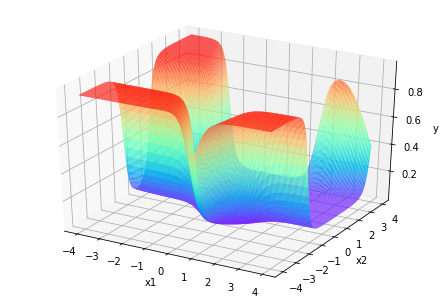

In [25]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
x1 = np.arange(-4, 4, 0.05)
x2 = np.arange(-4, 4, 0.05)
X, Y = np.meshgrid(x1, x2)
Z = np.zeros(X.shape)
width, height = X.shape

w11 = 0.00
w12 = 4.11
b1 = 4.62
w21 = 1.09
w22 = -2.63
b2 = 6.40
w13 = 2.90
w23 = -0.33
b3 = -3.42
w14 = 4.47
w24 = 1.53
b4 = 4.30
w31 = -6.00
w32 = -6.93
w33 = 6.54
w34 = -6.65
b5 = 9.73
for i in range(height):
    for j in range(width):
        x1 = X[i,j]
        x2 = Y[i,j]
        h1 = sigmoid(w11*x1+w12*x2+b1)
        h2 = sigmoid(w21*x1+w22*x2+b2)
        h3 = sigmoid(w13*x1+w23*x2+b3)
        h4 = sigmoid(w14*x1+w24*x2+b4)
        Z[i,j] = sigmoid(w31*h1+w32*h2+w33*h3+w34*h4+b5)

ax.plot_surface(X, Y, Z, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
#ax.set_zlim(0,40)
plt.show()

From what we can see the data is not fitted completely because our is still not equal to 0.